In [1]:
print('Hiiv')

Hiiv


In [2]:
import tensorflow as tf
import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
EPOCHS = 100
CHANNELS = 3


In [4]:
dataset = keras.utils.image_dataset_from_directory(
    '../Dataset/PlantVillage', 
    # labels="inferred",
    # label_mode="int",
    # class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(256, 256),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    # interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True,
)

Found 2153 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[2 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 0 0 0 0 0 1]


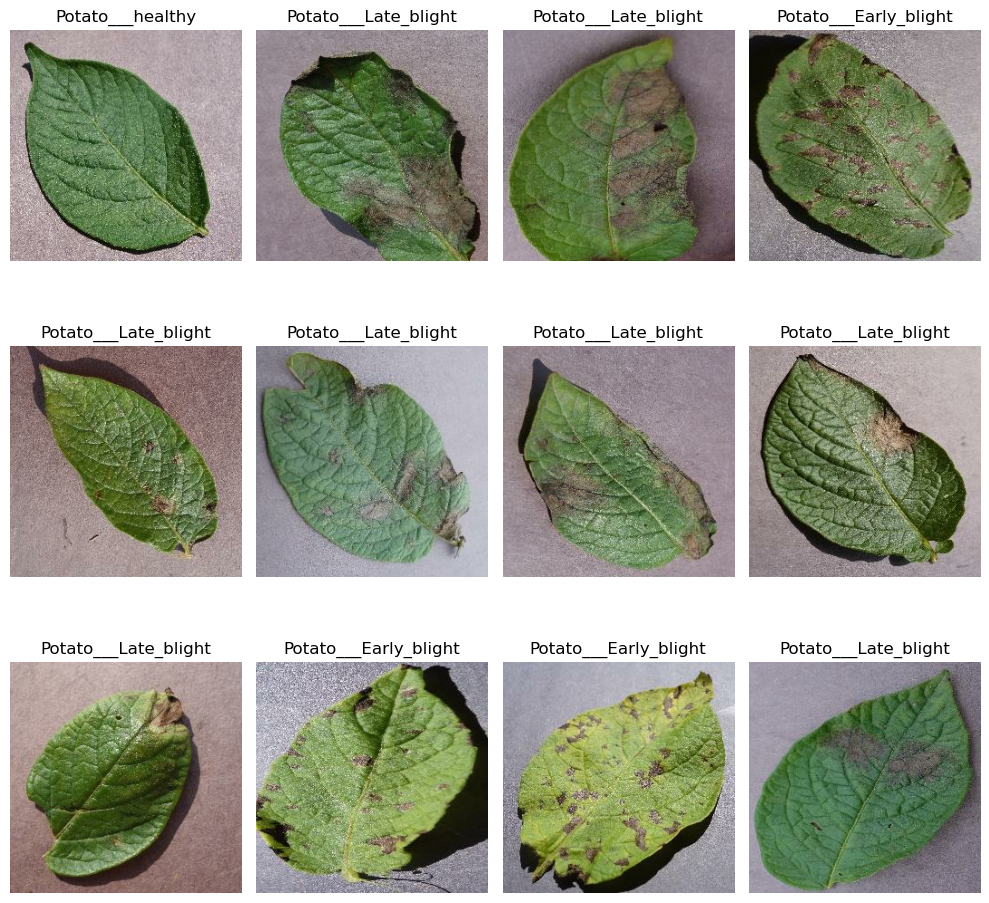

In [6]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds = dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [11]:
validation_ds = test_ds.take(6)
len(validation_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100000):
    assert (train_split+test_split+val_split) == 1
    ds_size = len(ds)
    if shuffle:
         ds = ds. shuffle (shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds. take (train_size)
    val_ds = ds.skip (train_size).take (val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds  = get_dataset_partitions_tf(dataset)

In [15]:
train_ds = train_ds.cache().shuffle (1000). prefetch (buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle (1000). prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle (1000). prefetch (buffer_size=tf.data.AUTOTUNE)

for image_batch, labels_batch in dataset. take (1):
    print (image_batch [0].numpy()/255)

[[[0.7019608  0.70980394 0.75686276]
  [0.70980394 0.7176471  0.7647059 ]
  [0.7019608  0.70980394 0.75686276]
  ...
  [0.627451   0.6156863  0.65882355]
  [0.62352943 0.6117647  0.654902  ]
  [0.58431375 0.57254905 0.6156863 ]]

 [[0.7137255  0.72156864 0.76862746]
  [0.7254902  0.73333335 0.78039217]
  [0.7176471  0.7254902  0.77254903]
  ...
  [0.57254905 0.56078434 0.6039216 ]
  [0.5647059  0.5529412  0.59607846]
  [0.54509807 0.53333336 0.5764706 ]]

 [[0.70980394 0.7176471  0.7647059 ]
  [0.72156864 0.7294118  0.7764706 ]
  [0.72156864 0.7294118  0.7764706 ]
  ...
  [0.5686275  0.5568628  0.6       ]
  [0.57254905 0.56078434 0.6039216 ]
  [0.5882353  0.5764706  0.61960787]]

 ...

 [[0.72156864 0.7176471  0.7490196 ]
  [0.7176471  0.7137255  0.74509805]
  [0.7137255  0.70980394 0.7411765 ]
  ...
  [0.52156866 0.5019608  0.5294118 ]
  [0.52156866 0.5019608  0.5294118 ]
  [0.5254902  0.5058824  0.53333336]]

 [[0.70980394 0.7058824  0.7372549 ]
  [0.7137255  0.70980394 0.7411765 ]


In [16]:
IMAGE_SIZE  = 256


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 224
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    layers.Rescaling(1.0 / 255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(n_classes, activation='softmax')
])

model.summary()


c:\Users\yuvra\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         4,803 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,963 (753.76 KB)

 Trainable params: 192,963 (753.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

: 

In [ ]:
history = model.fit(train_ds, batch_size=BATCH_SIZE,validation_data=val_ds, verbose=1, epochs=EPOCHS)

Epoch 1/100


In [ ]:
scores = model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.9653 - loss: 0.1016


In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

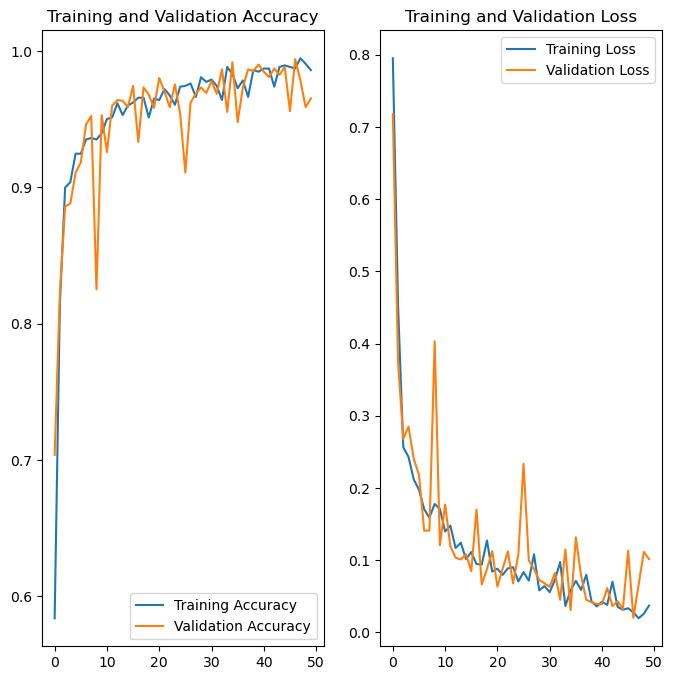

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Predicted Label:  Potato___Early_blight


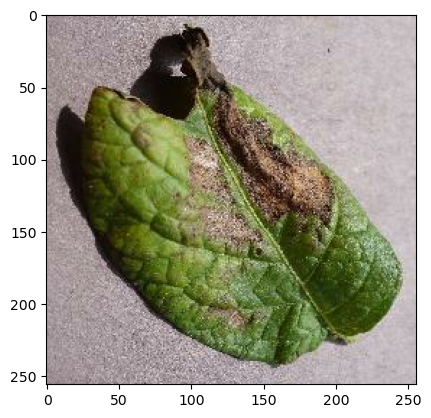

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image =  images_batch [0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label: ",class_names[labels_batch [0].numpy()])
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ",class_names[np.argmax (batch_prediction[0])])

In [ ]:
import os
from tensorflow import keras

# Ensure the Models directory exists
models_dir = "../Models"
os.makedirs(models_dir, exist_ok=True)

# Get the next model version number
existing_versions = [
    int(name) for name in os.listdir(models_dir)
    if name.isdigit() and os.path.isdir(os.path.join(models_dir, name))
]
model_version = max(existing_versions + [0]) + 1

# Define path to save model in TF format
model_path = os.path.join(models_dir, str(model_version))

# Save the model in TensorFlow SavedModel format
model.export(model_path)

print(f"Model saved in TensorFlow format at: {model_path}")


INFO:tensorflow:Assets written to: Models\1\assets


INFO:tensorflow:Assets written to: Models\1\assets


Saved artifact at 'Models\1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2451071561232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451071563536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072535824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072536592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072537360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072535632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072536784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072537552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072537744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072537936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2451072539472: TensorSpec(shape=(), dtype=

['.git',
 'api',
 'Dataset',
 'Models',
 'model_training.ipynb',
 'README.md',
 'Training']